In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_excel('Raw_data/registrations.xlsx')
ml1 = pd.read_excel('Raw_data/ML1res.xls')
ml2 = pd.read_excel('Raw_data/ML2-res.xls')
ml3 = pd.read_excel('Raw_data/ML3-res.xls')
dl = pd.read_excel('Raw_data/DL1-res.xls')
predict = pd.read_excel('Raw_data/predict-res.xls')

In [3]:
m1 = ml1.columns.tolist()
m2 = ml2.columns.tolist()
m3=ml3.columns.tolist()
d=dl.columns.tolist()
p=predict.columns.tolist()

In [4]:
m_list = [m1,m2,m3,d,p]
m_col=[]
m_m = m1+m2+m3+d+p
se = set(m_m)
master_names = list(se)

## Ratio of Genders

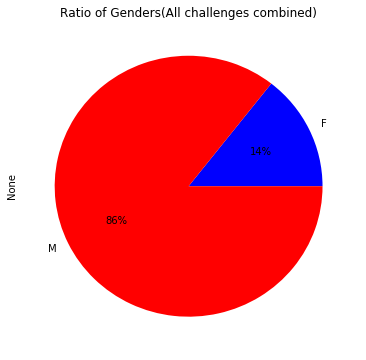

In [7]:
data = data.drop_duplicates(subset = ['Email'])
data['Years of Experience'] = data['Years of Experience'].replace(0, np.NaN)
data['Gender'].replace('D',None, inplace=True)
data.groupby('Gender').size().plot(kind='pie',figsize=(6,6), colors=['b','r'], title='Ratio of Genders(All challenges combined)', autopct='%1.0f%%')
plt.show()

In [11]:
c1 = data[data['Flag'] == 'ML1reg']
c2 = data[data['Flag'] == 'ML2reg']
c3 = data[data['Flag'] == 'ML3reg']
c4 = data[data['Flag'] == 'DL1reg']
c5 = data[data['Flag'] == 'Pred-reg']

In [12]:
cg = pd.concat([c1,c2,c3], ignore_index=True)
cd = pd.concat([c4,c5], ignore_index=True)

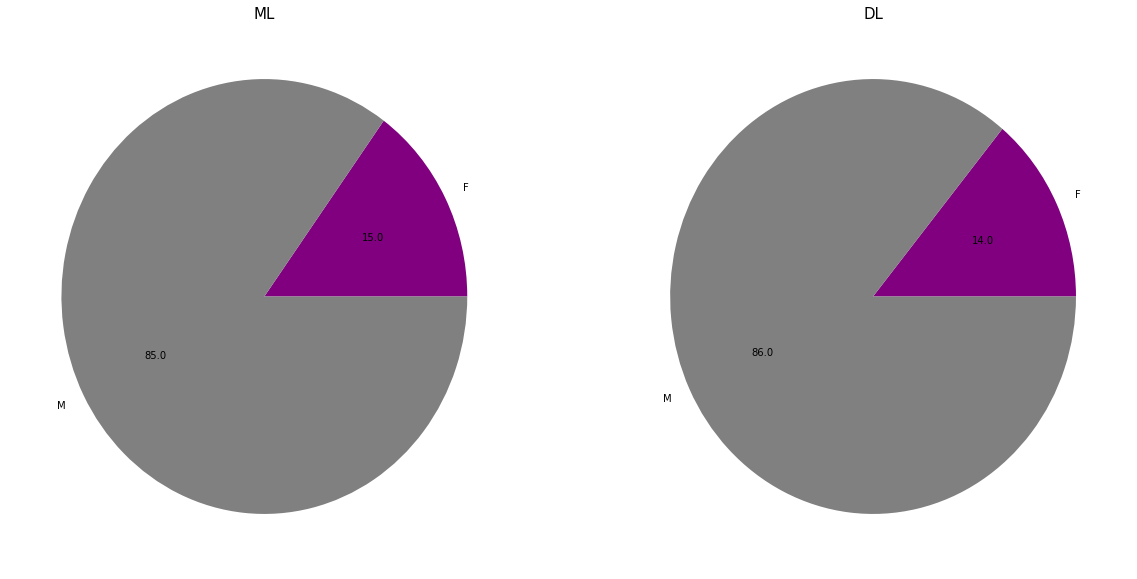

In [10]:
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ax1.pie(cg.groupby(data['Gender']).size(), autopct='%.1f', colors=['purple','gray'], labels=['F','M'])
ax2.pie(cd.groupby(data['Gender']).size(), autopct='%.1f', colors=['purple','gray'], labels=['F','M'])
ax1.set_title('ML',fontsize=15)
ax2.set_title('DL',fontsize=15)
plt.show()

In [13]:
percent = (845/456)*100

In [16]:
print('There was {}% more participation of females in ML compared to DL.'.format(int(percent)))

There was 185% more participation of females in ML compared to DL.


## Designations

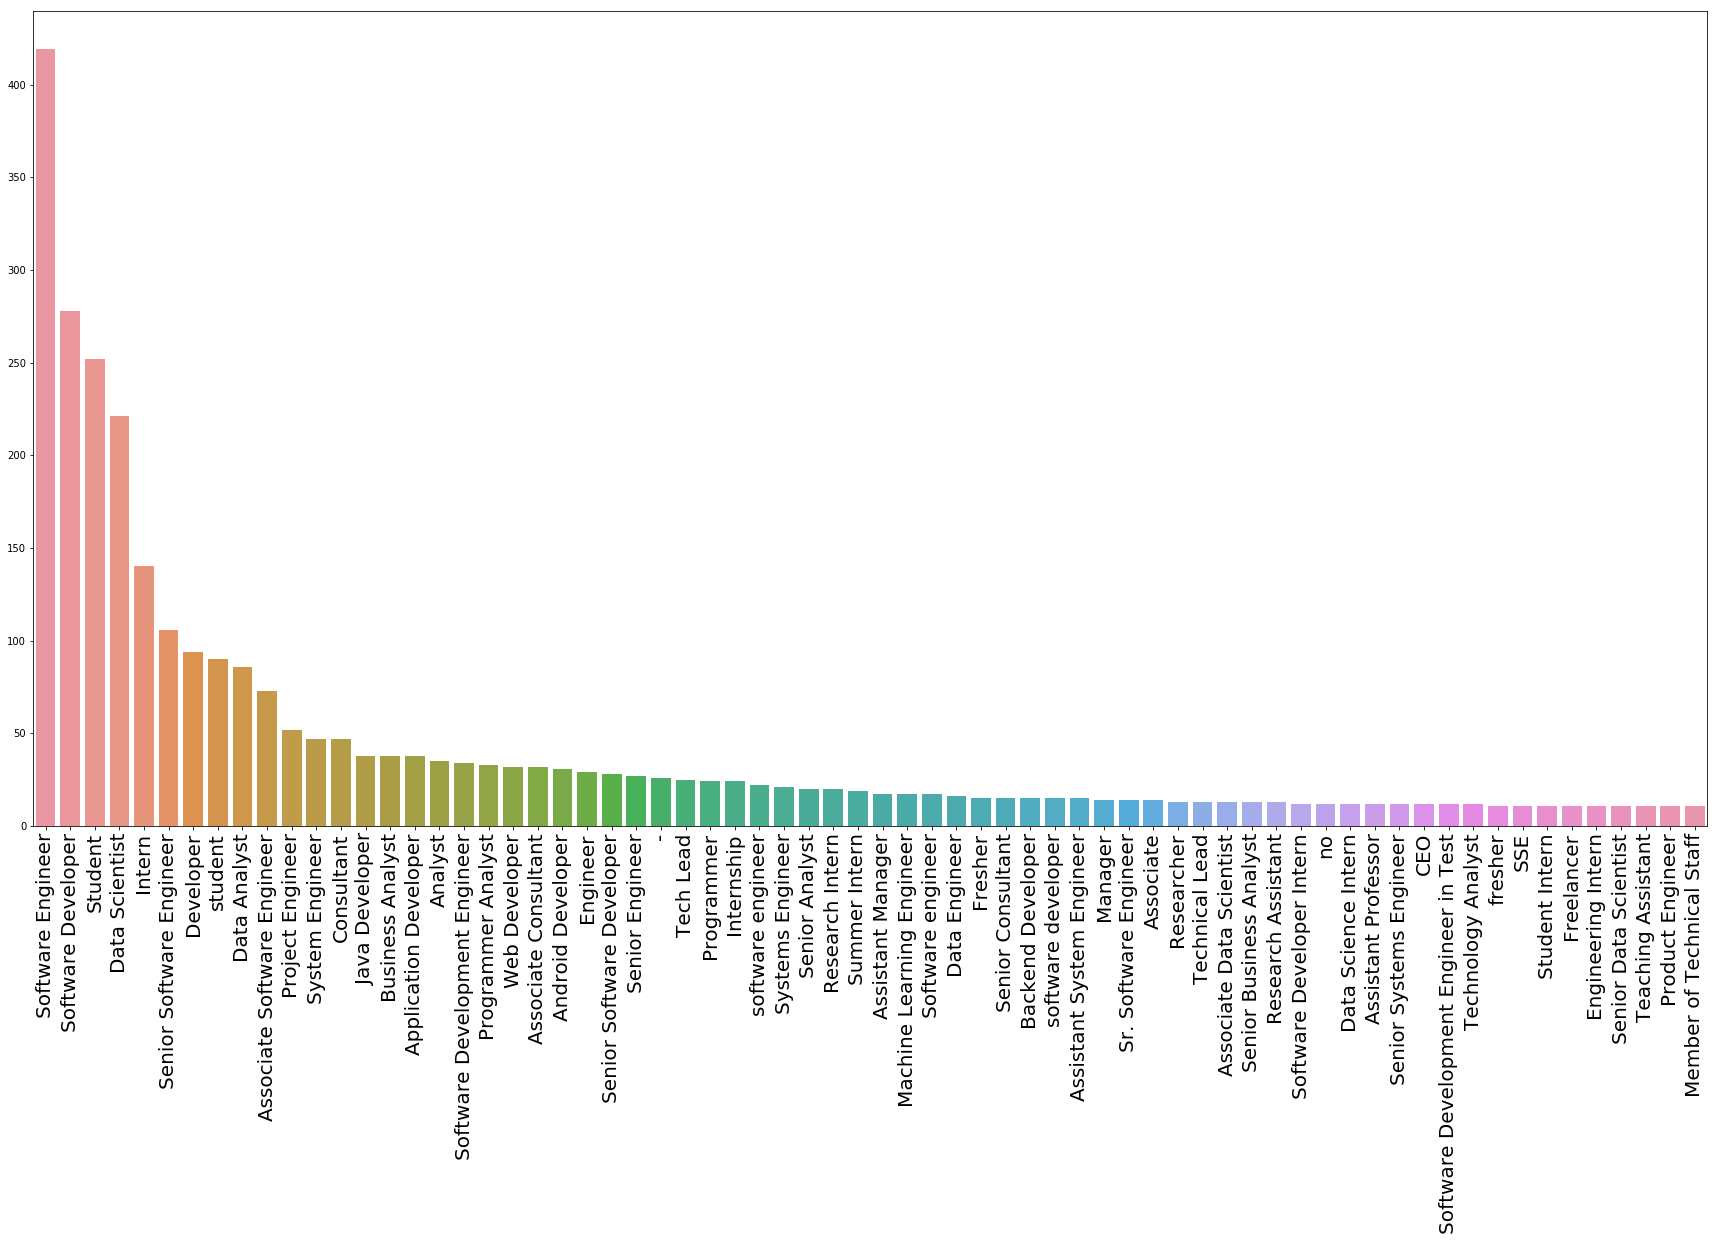

In [18]:
d1 = data['Designation'].value_counts()
d1 = d1[d1.values > 10]
fig = plt.figure(figsize=(30,15))
sns.barplot(d1.index, d1.values)
plt.xticks(fontsize=20,rotation = 90)
plt.show()

In [5]:
des_list = ['Data Scientist','Data Analyst','Business Analyst','Analyst','Programmer Analyst','Senior Analyst','Machine Learning Engineer','Assosiate Data Scientist','Data Engineer','Data Science Intern','Technology Analyst','Senior Business Analyst','Machine Learning Intern','Senior Data Scientist','data scientist']

In [6]:
data_des = data[data['Designation'].isin(des_list)]

In [7]:
data_des.Designation.value_counts()

Data Scientist               344
Data Analyst                 115
Business Analyst              47
Analyst                       43
Programmer Analyst            39
Senior Analyst                29
Machine Learning Engineer     24
Data Engineer                 20
Data Science Intern           18
Senior Business Analyst       16
Technology Analyst            16
Machine Learning Intern       15
Senior Data Scientist         14
data scientist                11
Name: Designation, dtype: int64

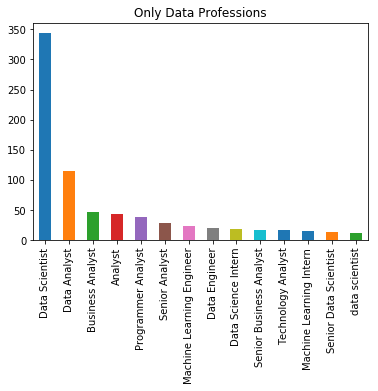

In [10]:
data_des.Designation.value_counts().plot(kind='bar')
plt.title('Only Data Professions')
plt.show()

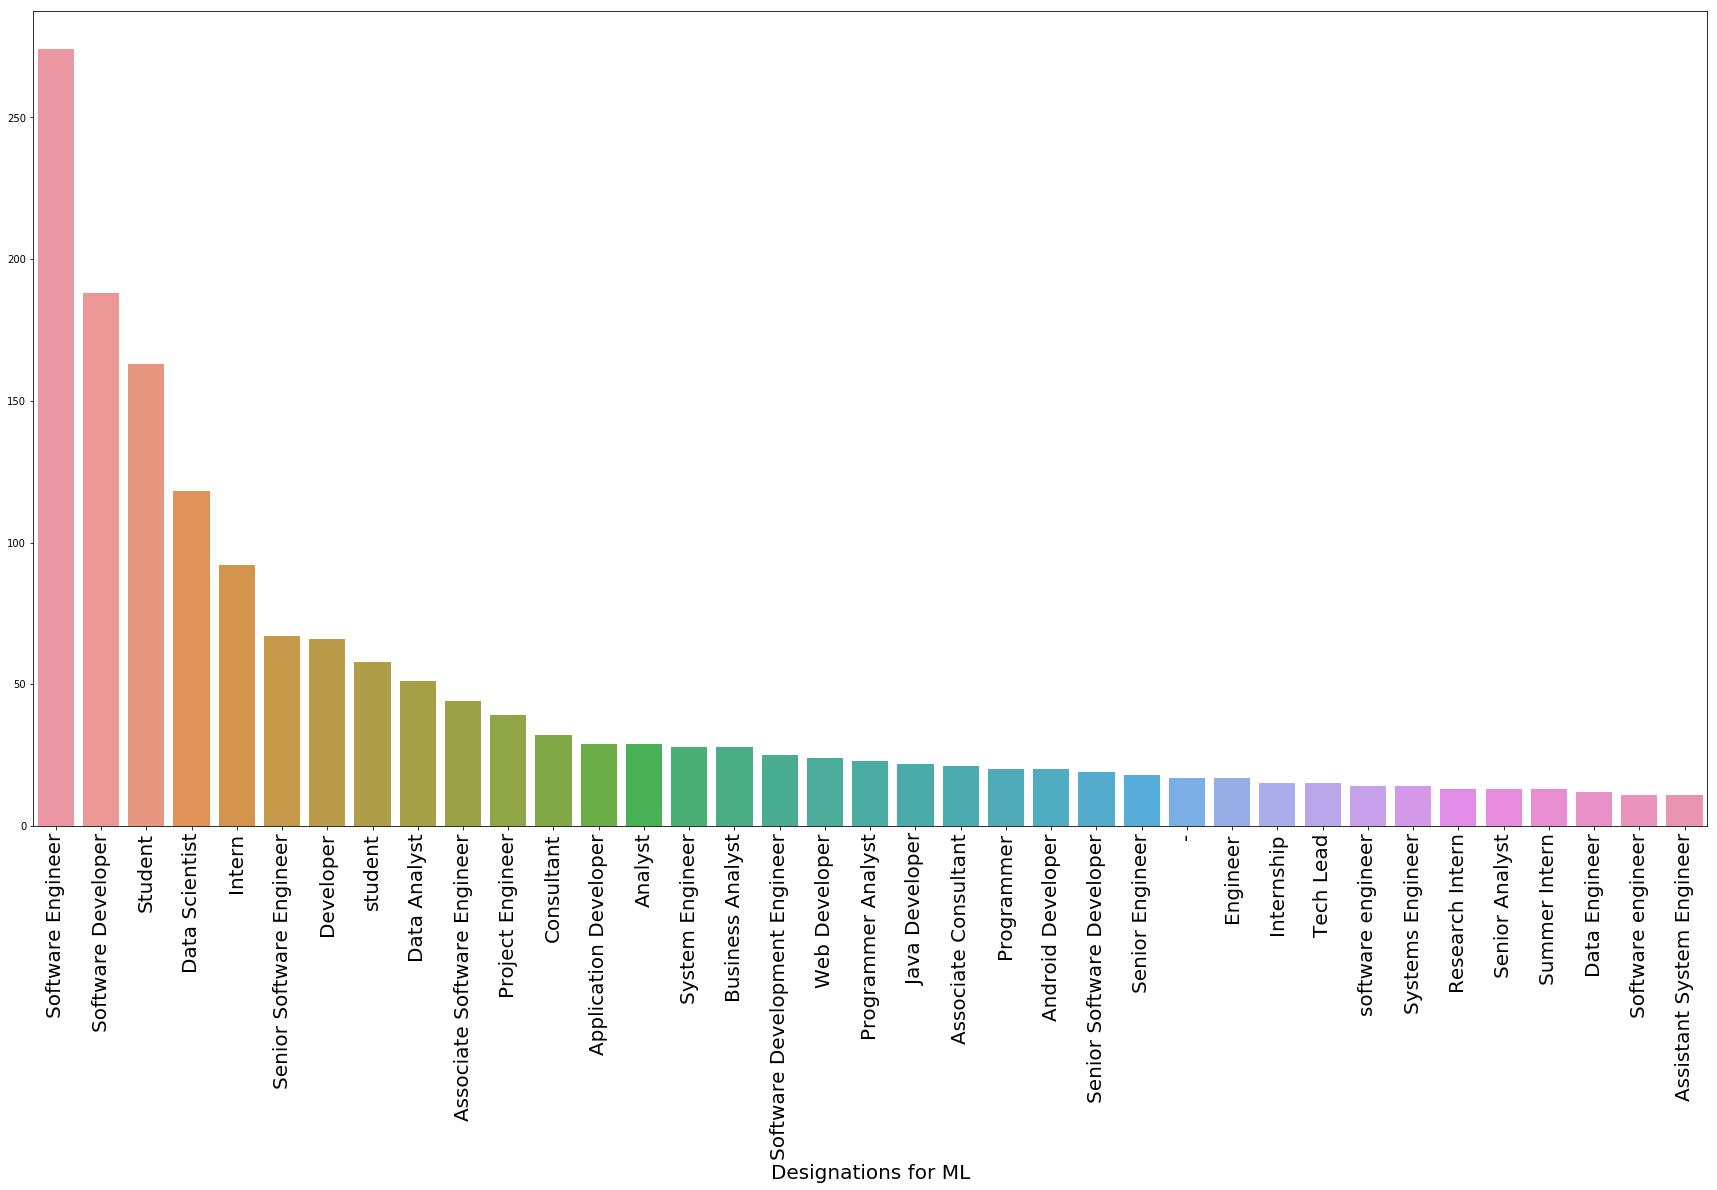

In [21]:
c1 = cg['Designation'].value_counts()
c1 = c1[c1.values > 10]
fig = plt.figure(figsize=(30,15))
sns.barplot(c1.index, c1.values)
plt.xticks(fontsize=20,rotation = 90)
plt.xlabel('Designations for ML',fontsize=20)
plt.show()

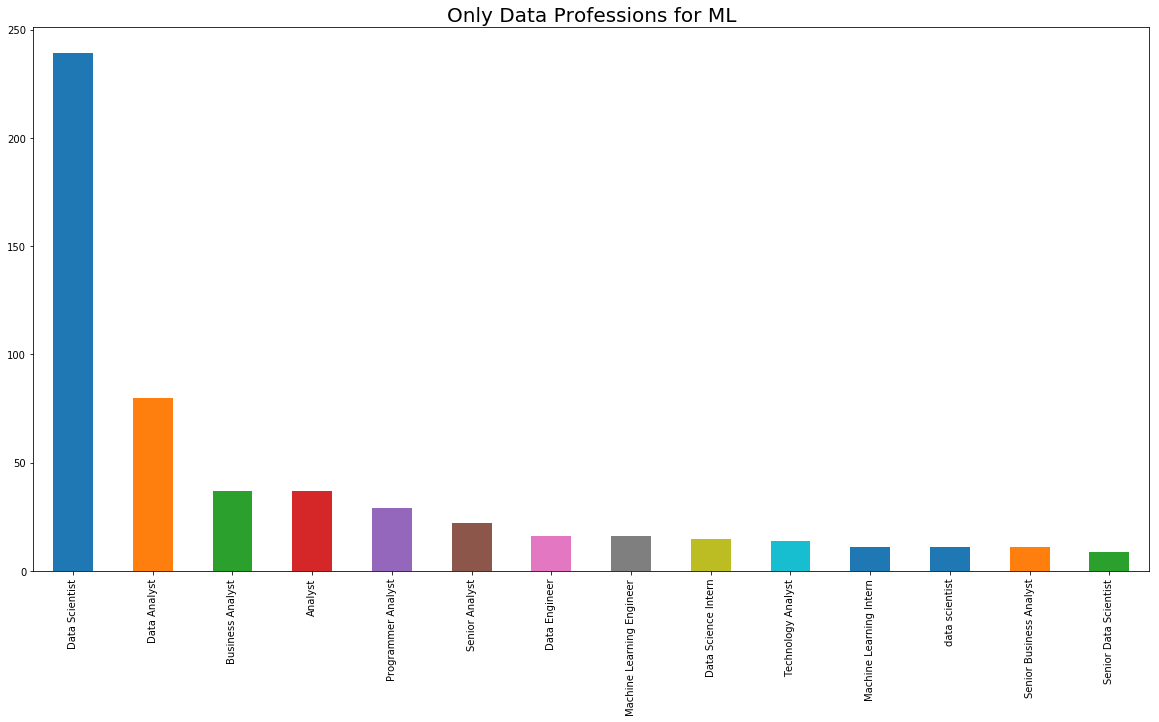

In [19]:
ddm = cg[cg['Designation'].isin(des_list)]
ddm.Designation.value_counts().plot(kind='bar', figsize=(20,10))
plt.title('Only Data Professions for ML',fontsize=20)
plt.show()

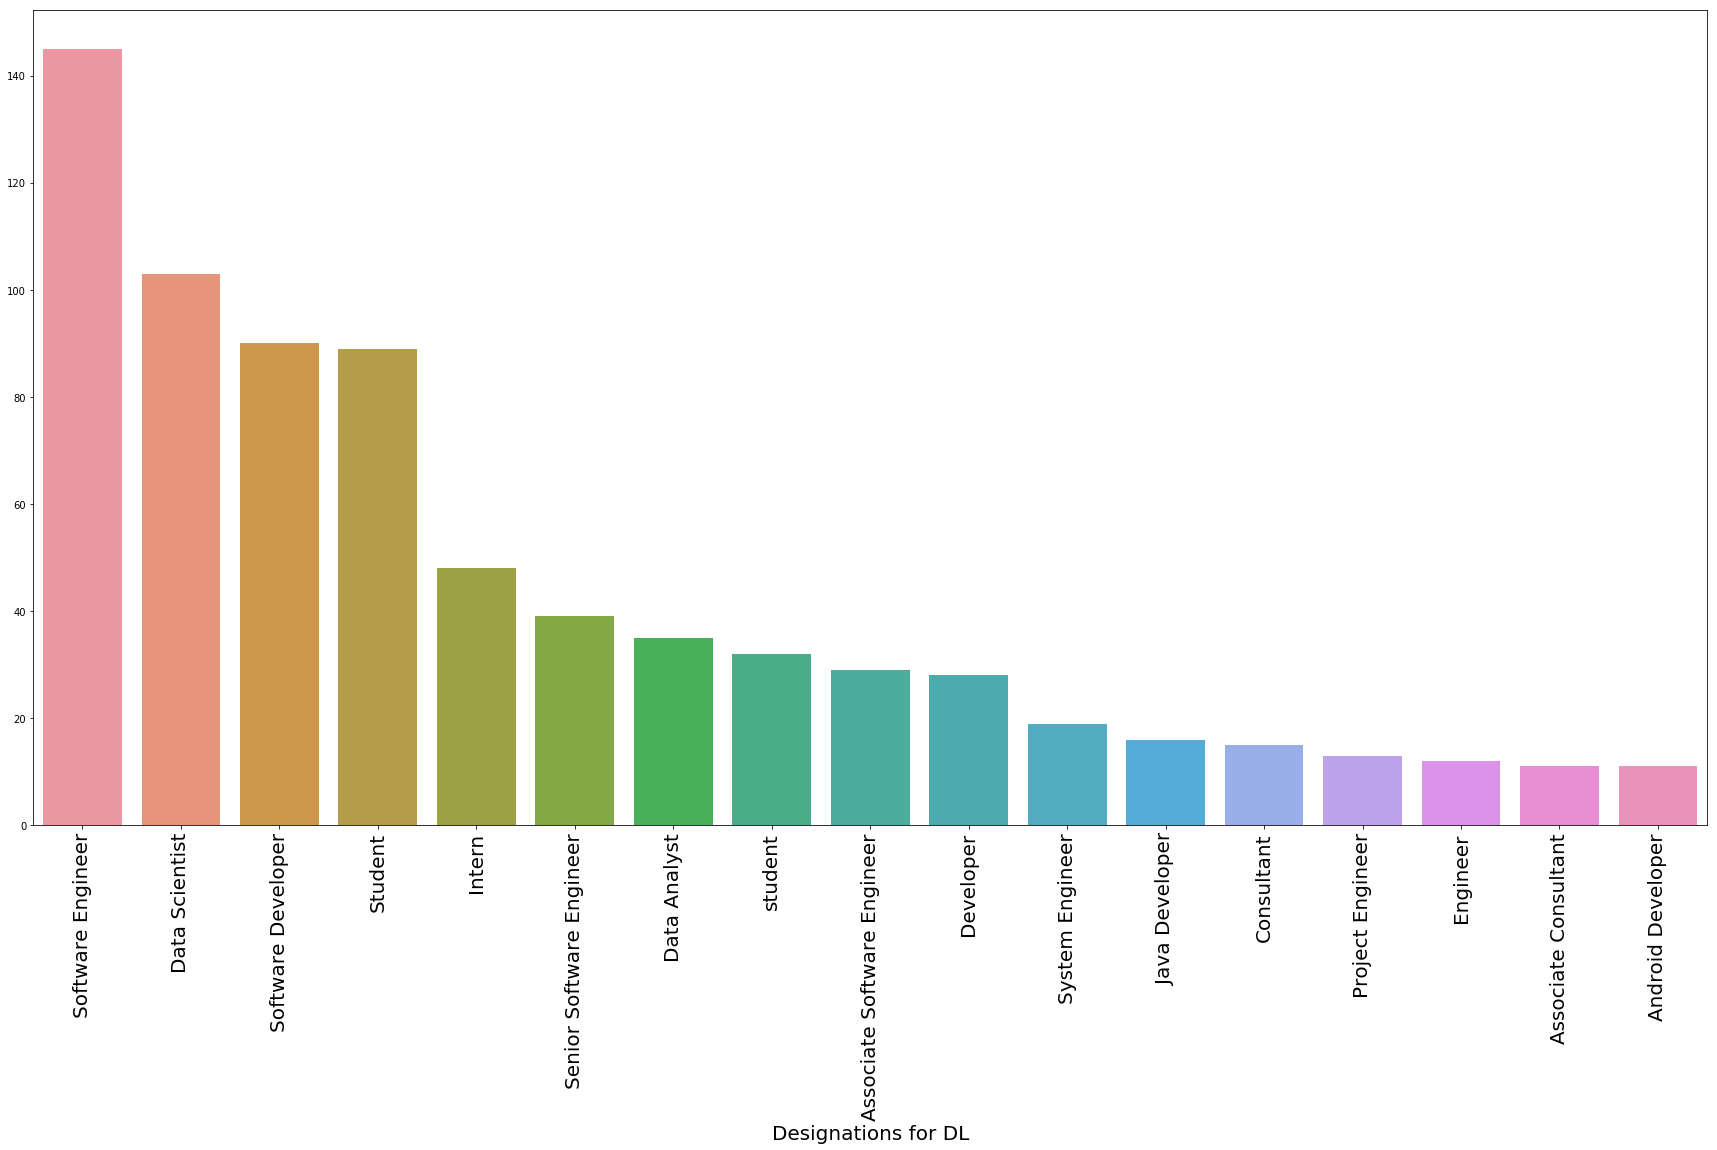

In [23]:
c2 = cd['Designation'].value_counts()
c2 = c2[c2.values > 10]
fig = plt.figure(figsize=(30,15))
sns.barplot(c2.index, c2.values)
plt.xticks(fontsize=20,rotation = 90)
plt.xlabel('Designations for DL',fontsize=20)
plt.show()

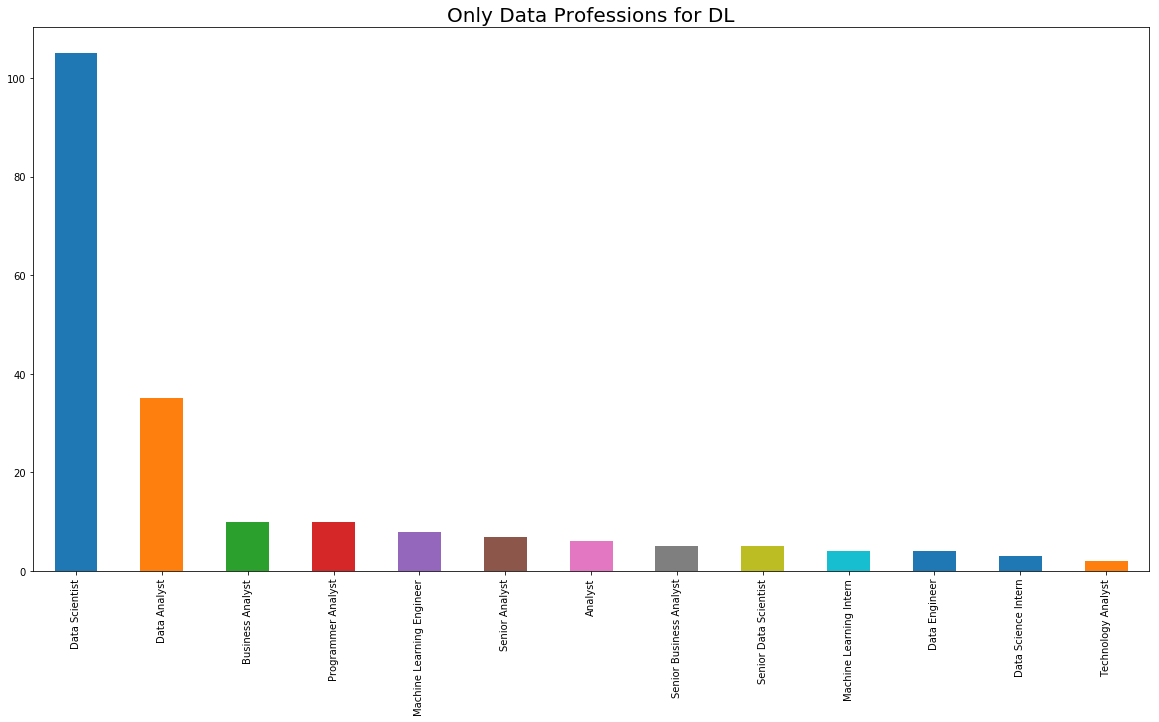

In [18]:
ddd = cd[cd['Designation'].isin(des_list)]
ddd.Designation.value_counts().plot(kind='bar', figsize=(20,10))
plt.title('Only Data Professions for DL',fontsize=20)
plt.show()

## Country Participation

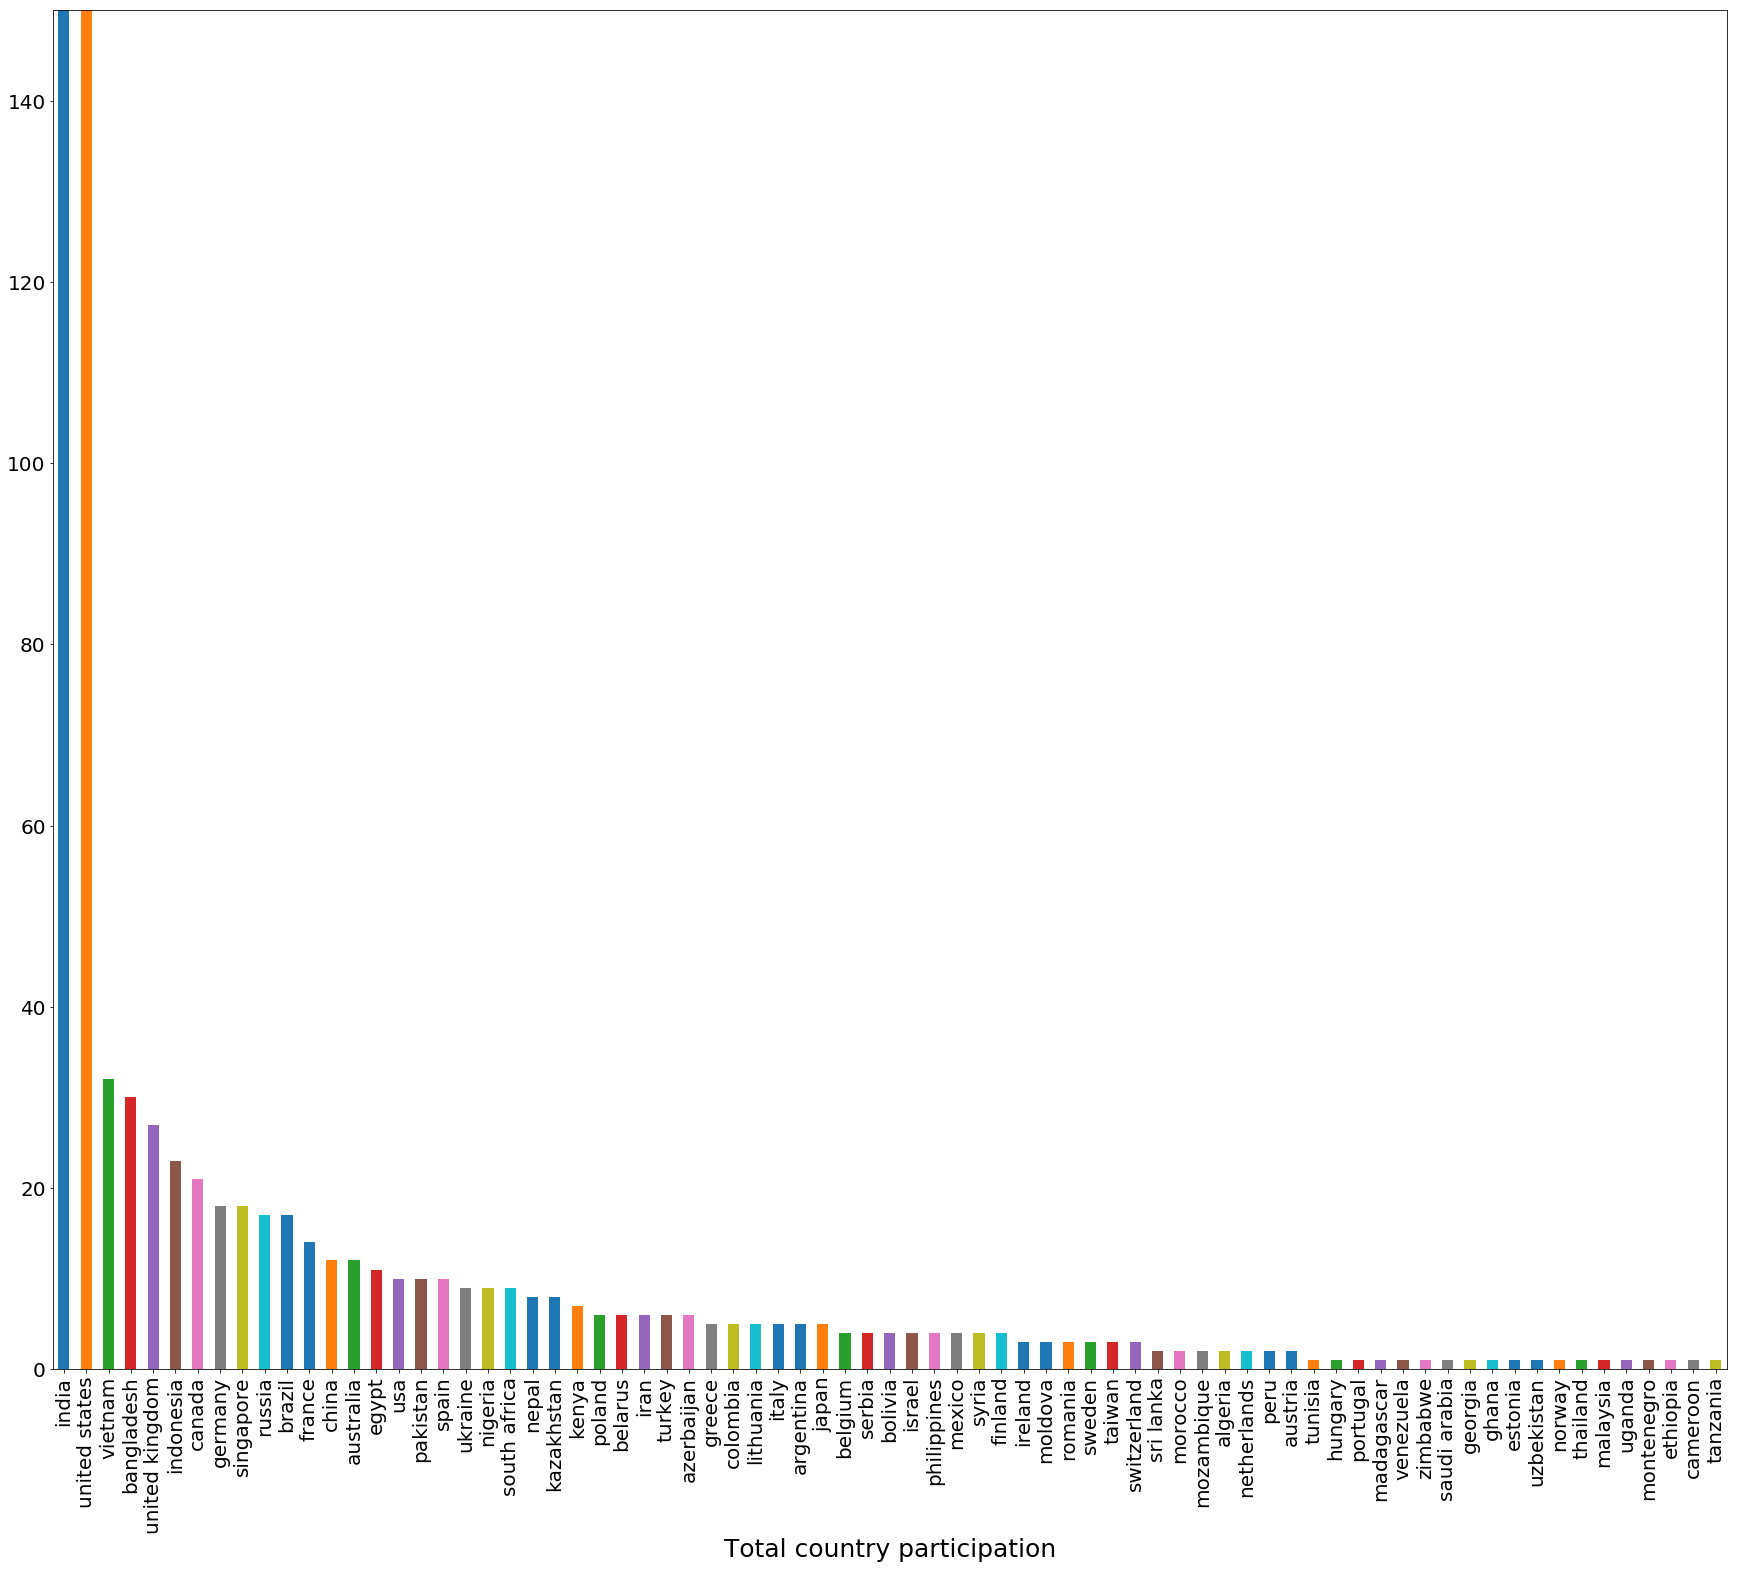

In [20]:
kar=[]
country_names = pd.read_excel('country_names.xlsx')
c_name = country_names['Name'].str.lower().tolist()
country = data['Location'].str.lower()
country = country.str.split(',')
ar = country.dropna()
hy = ar.reset_index(drop=True)
for i in range(len(hy)):
    temp = hy[i][-1]
    kar.append(temp)
kar = [x.strip() for x in kar]
kar=list(set(kar))
kar = list(set(kar).intersection(c_name))
data['Location'] = data['Location'].map(lambda x: str(x))
data['country'] = data['Location'].map(lambda x: x.split(',')[-1])
data['country'] = data['country'].map(lambda x: x.strip().lower())
data2 = data.loc[data['country'].isin(kar),:]
data2['country'].value_counts().plot(kind='bar', figsize=(30,25), ylim=(0,150), fontsize=20)
plt.xlabel('Total country participation',fontsize=25)
plt.show()

In [21]:
data2.country.value_counts()

india             9414
united states      237
vietnam             32
bangladesh          30
united kingdom      27
indonesia           23
canada              21
germany             18
singapore           18
russia              17
brazil              17
france              14
china               12
australia           12
egypt               11
usa                 10
pakistan            10
spain               10
ukraine              9
nigeria              9
south africa         9
nepal                8
kazakhstan           8
kenya                7
poland               6
belarus              6
iran                 6
turkey               6
azerbaijan           6
greece               5
                  ... 
romania              3
sweden               3
taiwan               3
switzerland          3
sri lanka            2
morocco              2
mozambique           2
algeria              2
netherlands          2
peru                 2
austria              2
tunisia              1
hungary    

In [27]:
gel = data2.country.value_counts()
print('United states has {}% participation in all challenges.'.format(round((gel['united states']/gel.sum())*100,2)))

United states has 2.34% participation in all challenges.


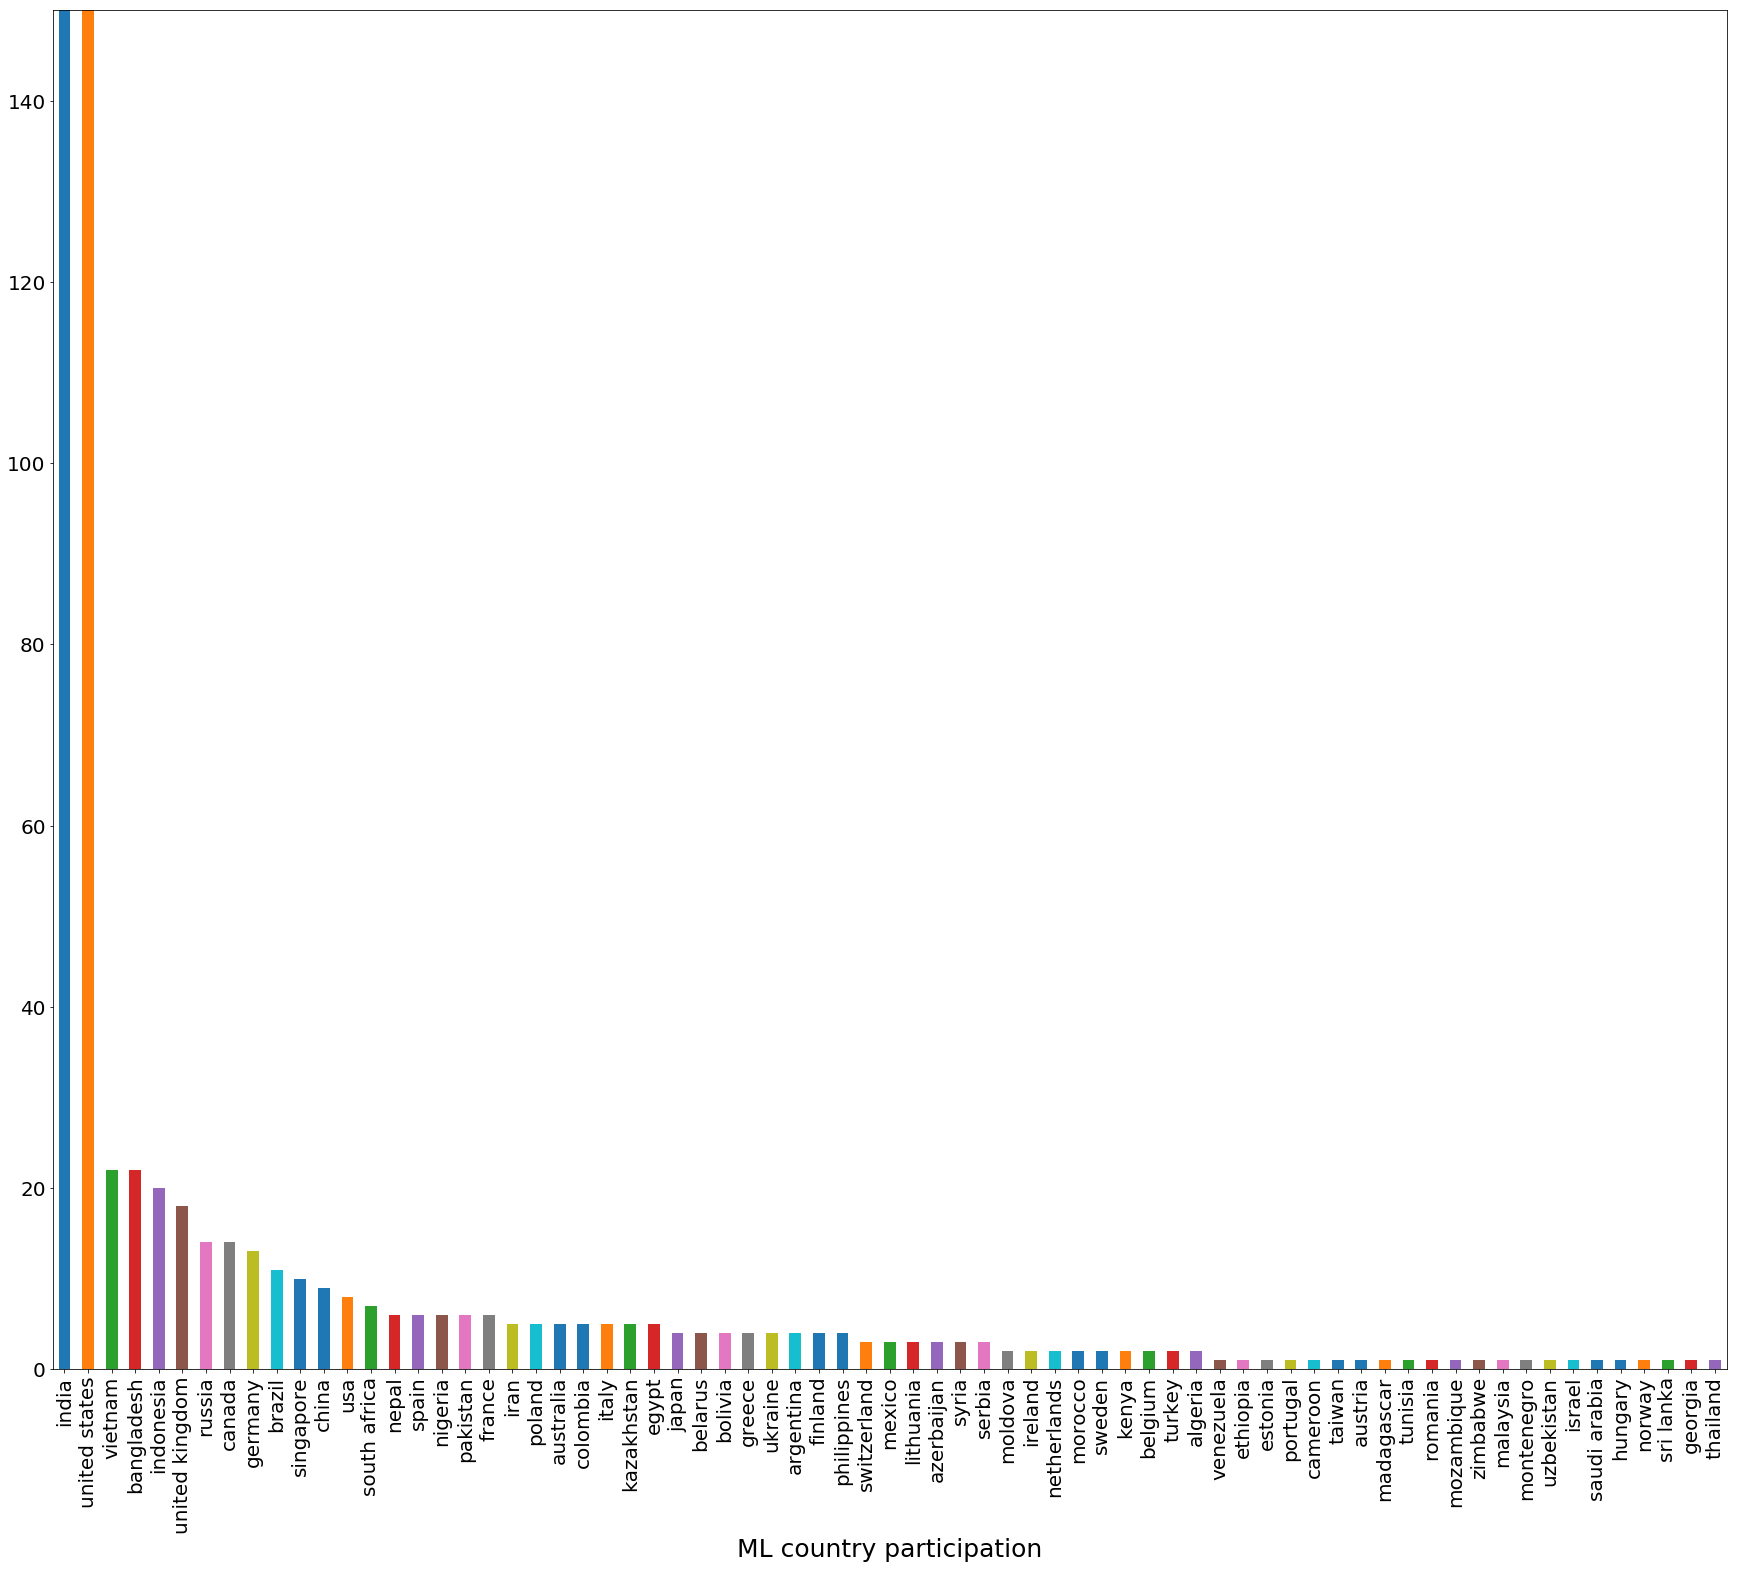

In [28]:
ml_coun=cg
ml_coun['Location'] = ml_coun['Location'].map(lambda x: str(x))
ml_coun['country'] = ml_coun['Location'].map(lambda x: x.split(',')[-1])
ml_coun['country'] = ml_coun['country'].map(lambda x: x.strip().lower())
data2 = ml_coun.loc[ml_coun['country'].isin(kar),:]
data2['country'].value_counts().plot(kind='bar', figsize=(30,25), ylim=(0,150), fontsize=20)
plt.xlabel('ML country participation',fontsize=25)
plt.show()

In [29]:
gel = data2.country.value_counts()
print('United states has {}% participation in ML challenges.'.format(round((gel['united states']/gel.sum())*100,2)))

United states has 2.27% participation in ML challenges.


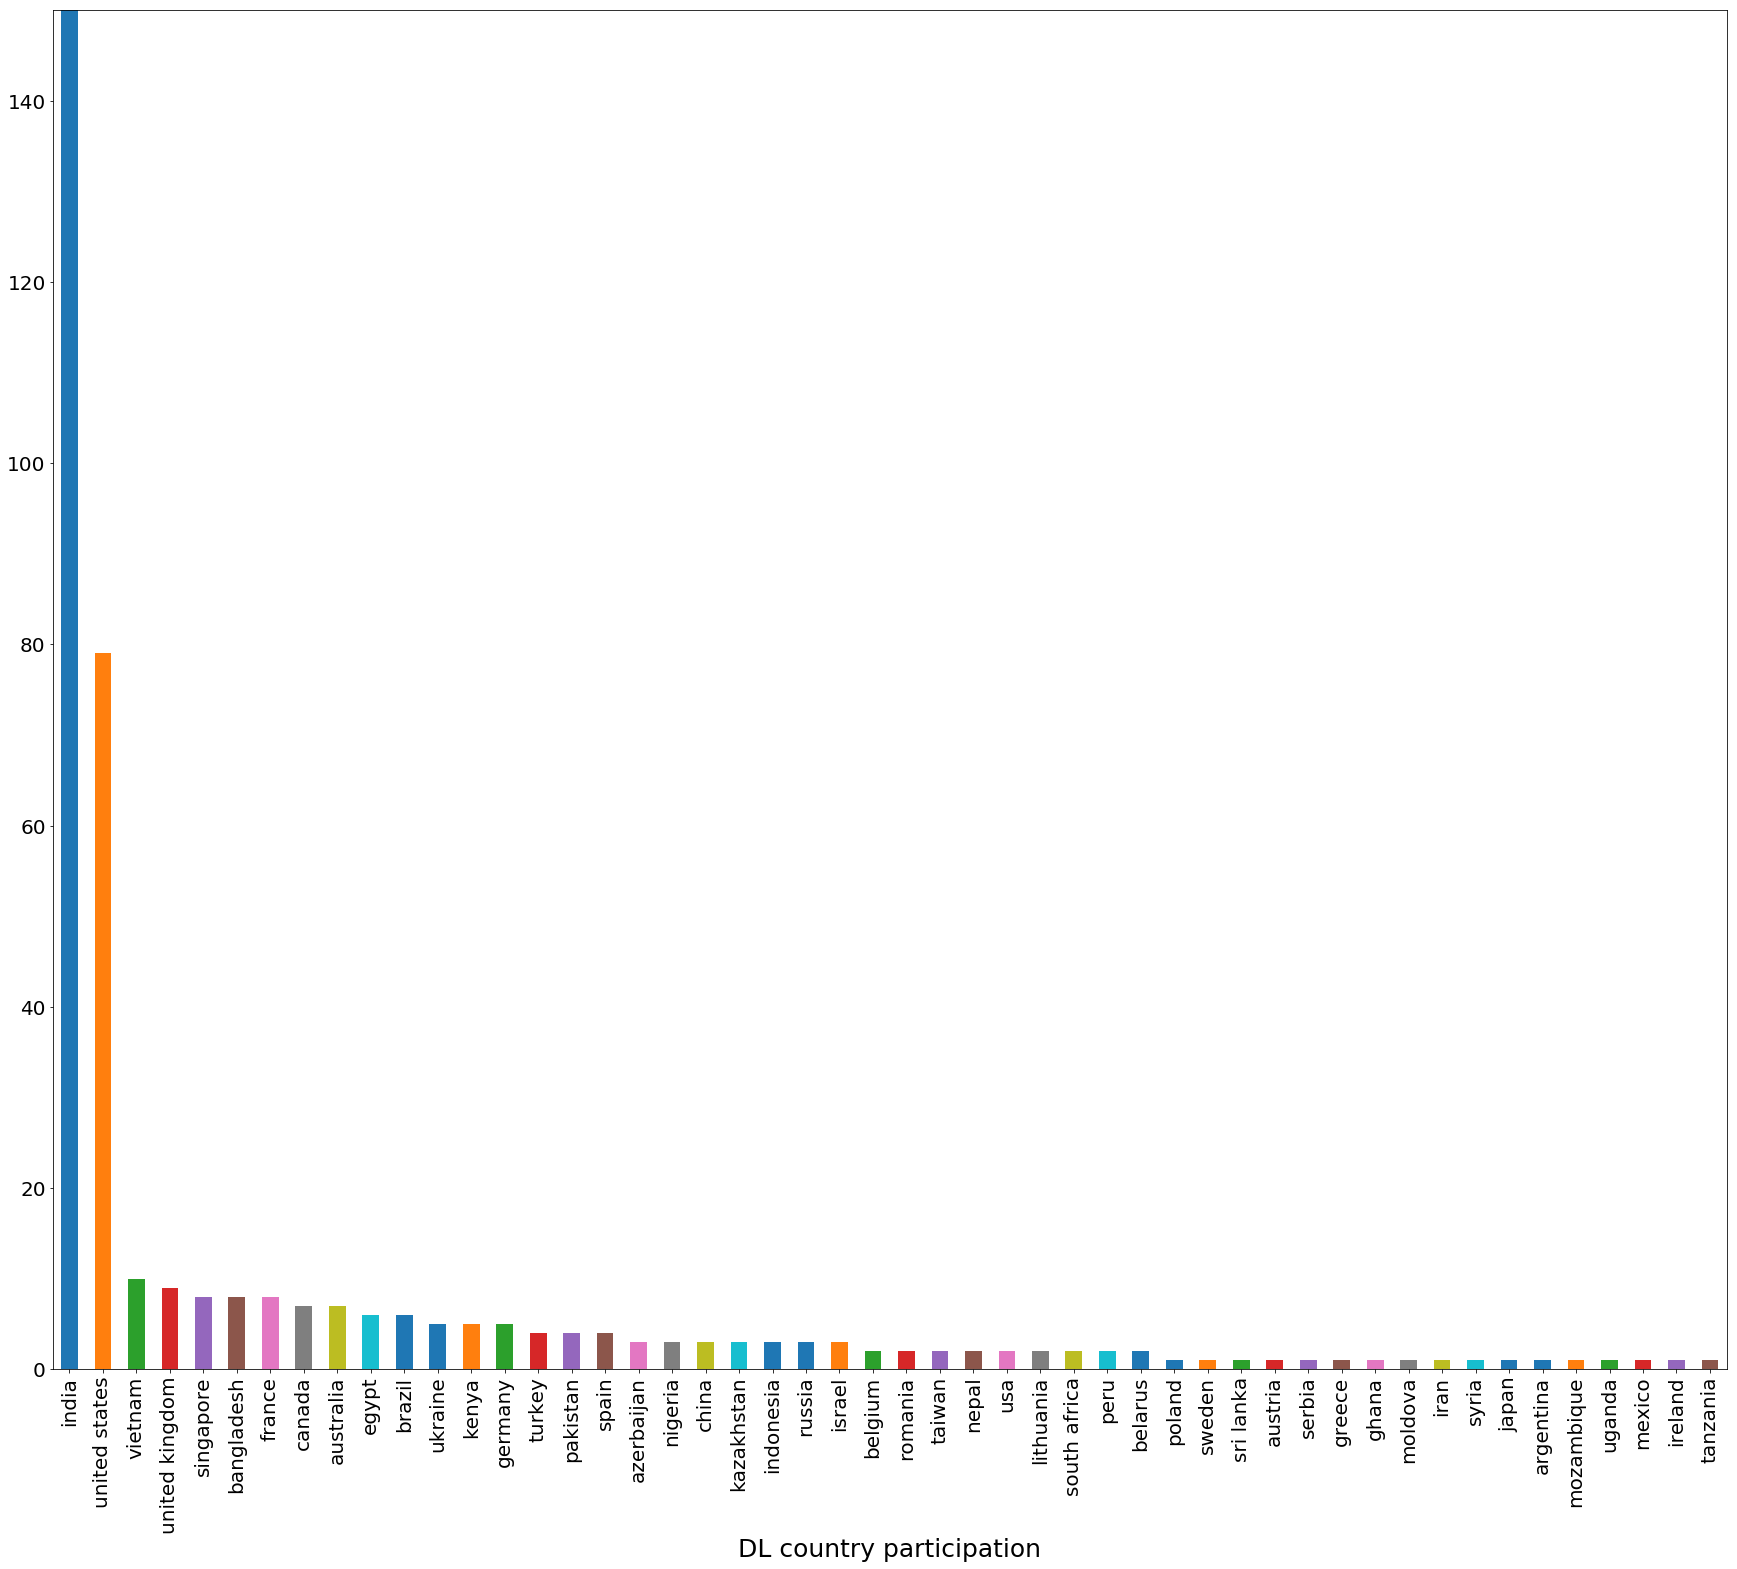

In [30]:
dl_coun=cd
dl_coun['Location'] = dl_coun['Location'].map(lambda x: str(x))
dl_coun['country'] = dl_coun['Location'].map(lambda x: x.split(',')[-1])
dl_coun['country'] = dl_coun['country'].map(lambda x: x.strip().lower())
data2 = dl_coun.loc[dl_coun['country'].isin(kar),:]
data2['country'].value_counts().plot(kind='bar', figsize=(30,25), ylim=(0,150), fontsize=20)
plt.xlabel('DL country participation',fontsize=25)
plt.show()

In [31]:
gel = data2.country.value_counts()
print('United states has {}% participation in DL challenges.'.format(round((gel['united states']/gel.sum())*100,2)))

United states has 2.5% participation in DL challenges.


## Years of Experience

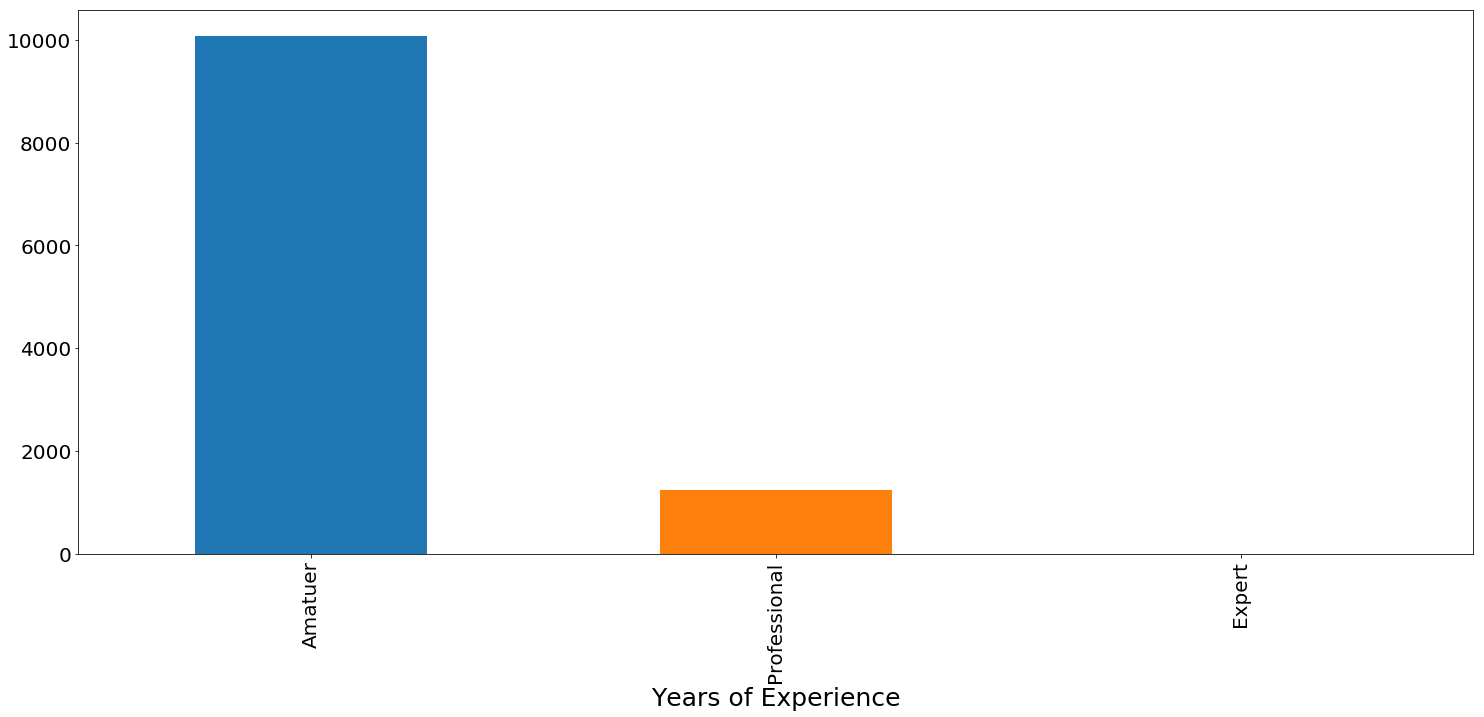

In [32]:
yoe = data[np.abs(data['Years of Experience']-data['Years of Experience'].mean())<=(data['Years of Experience'].std())]
elt = pd.cut(yoe['Years of Experience'], bins=[-1,2,6,100], labels=['Amatuer','Professional','Expert'])
elt.value_counts().plot(kind='bar',figsize=(25,10), fontsize=20)
plt.xlabel('Years of Experience',fontsize=25)
plt.show()

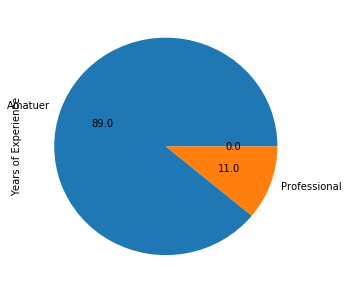

In [37]:
elt.value_counts().plot(kind='pie',figsize=(5,5), autopct='%.1f')
plt.show()

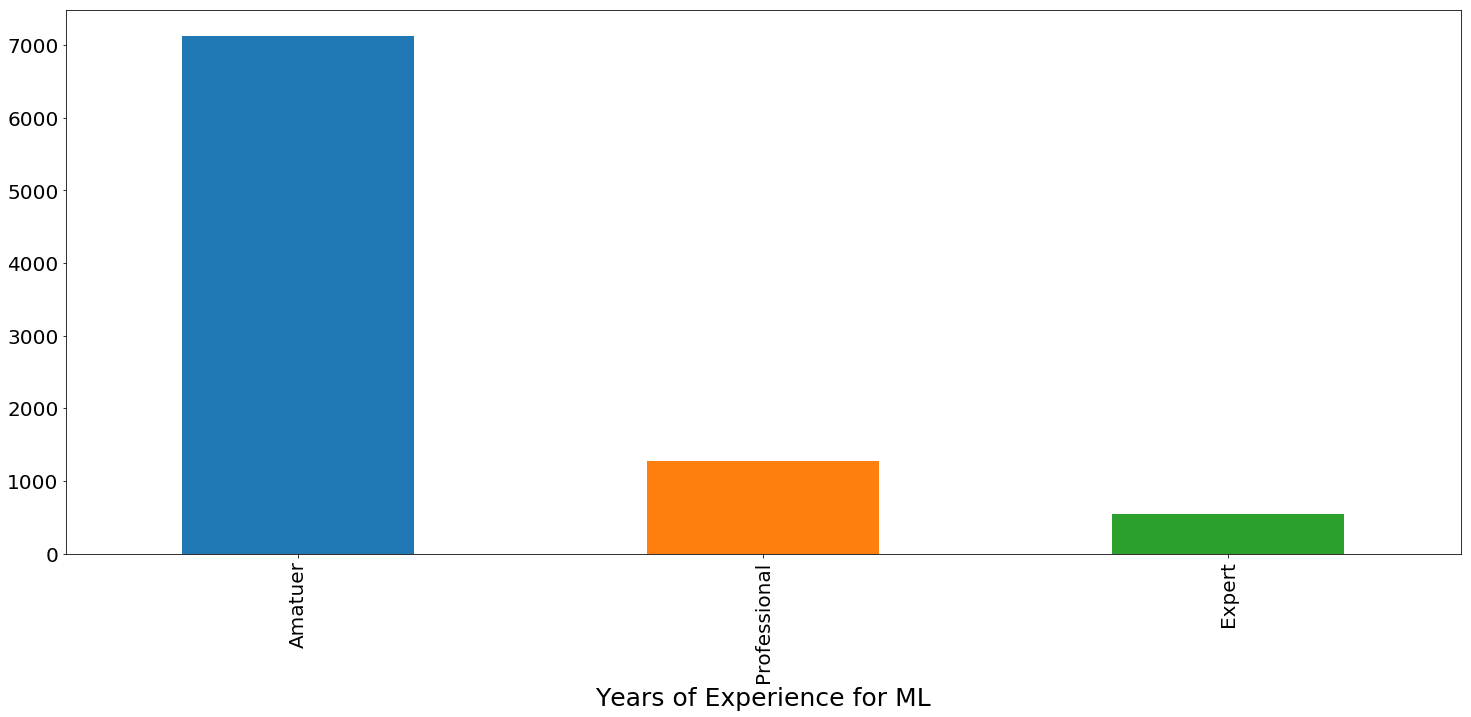

In [38]:
eltg = pd.cut(cg['Years of Experience'], bins=[-1,2,6,100], labels=['Amatuer','Professional','Expert'])
eltg.value_counts().plot(kind='bar',figsize=(25,10), fontsize=20)
plt.xlabel('Years of Experience for ML',fontsize=25)
plt.show()

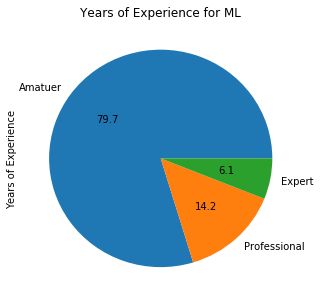

In [41]:
eltg.value_counts().plot(kind='pie',figsize=(5,5), autopct='%.1f')
plt.title('Years of Experience for ML')
plt.show()

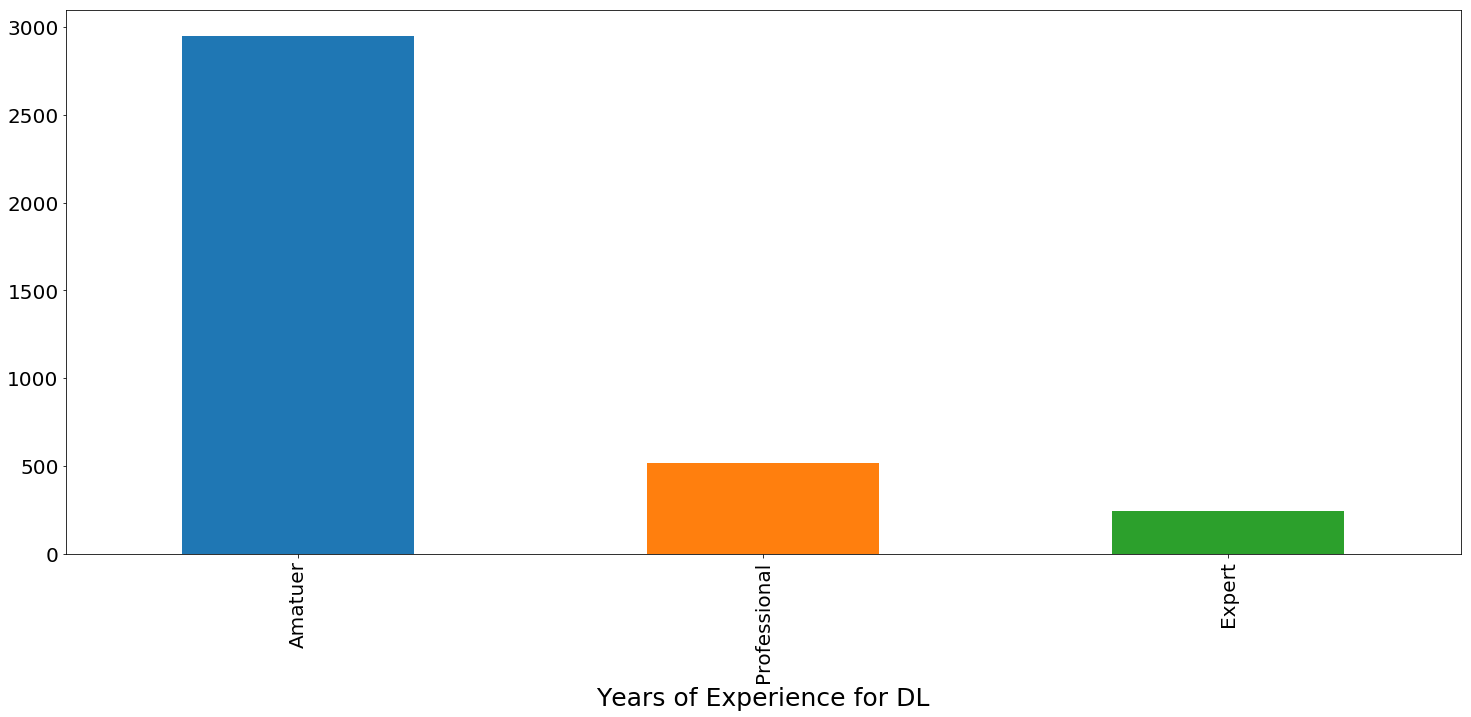

In [40]:
elt4 = pd.cut(cd['Years of Experience'], bins=[-1,2,6,100], labels=['Amatuer','Professional','Expert'])
elt4.value_counts().plot(kind='bar',figsize=(25,10), fontsize=20)
plt.xlabel('Years of Experience for DL',fontsize=25)
plt.show()

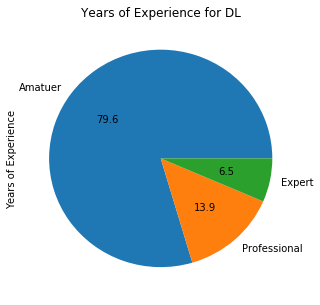

In [42]:
elt4.value_counts().plot(kind='pie',figsize=(5,5), autopct='%.1f')
plt.title('Years of Experience for DL')
plt.show()

## Company Participation

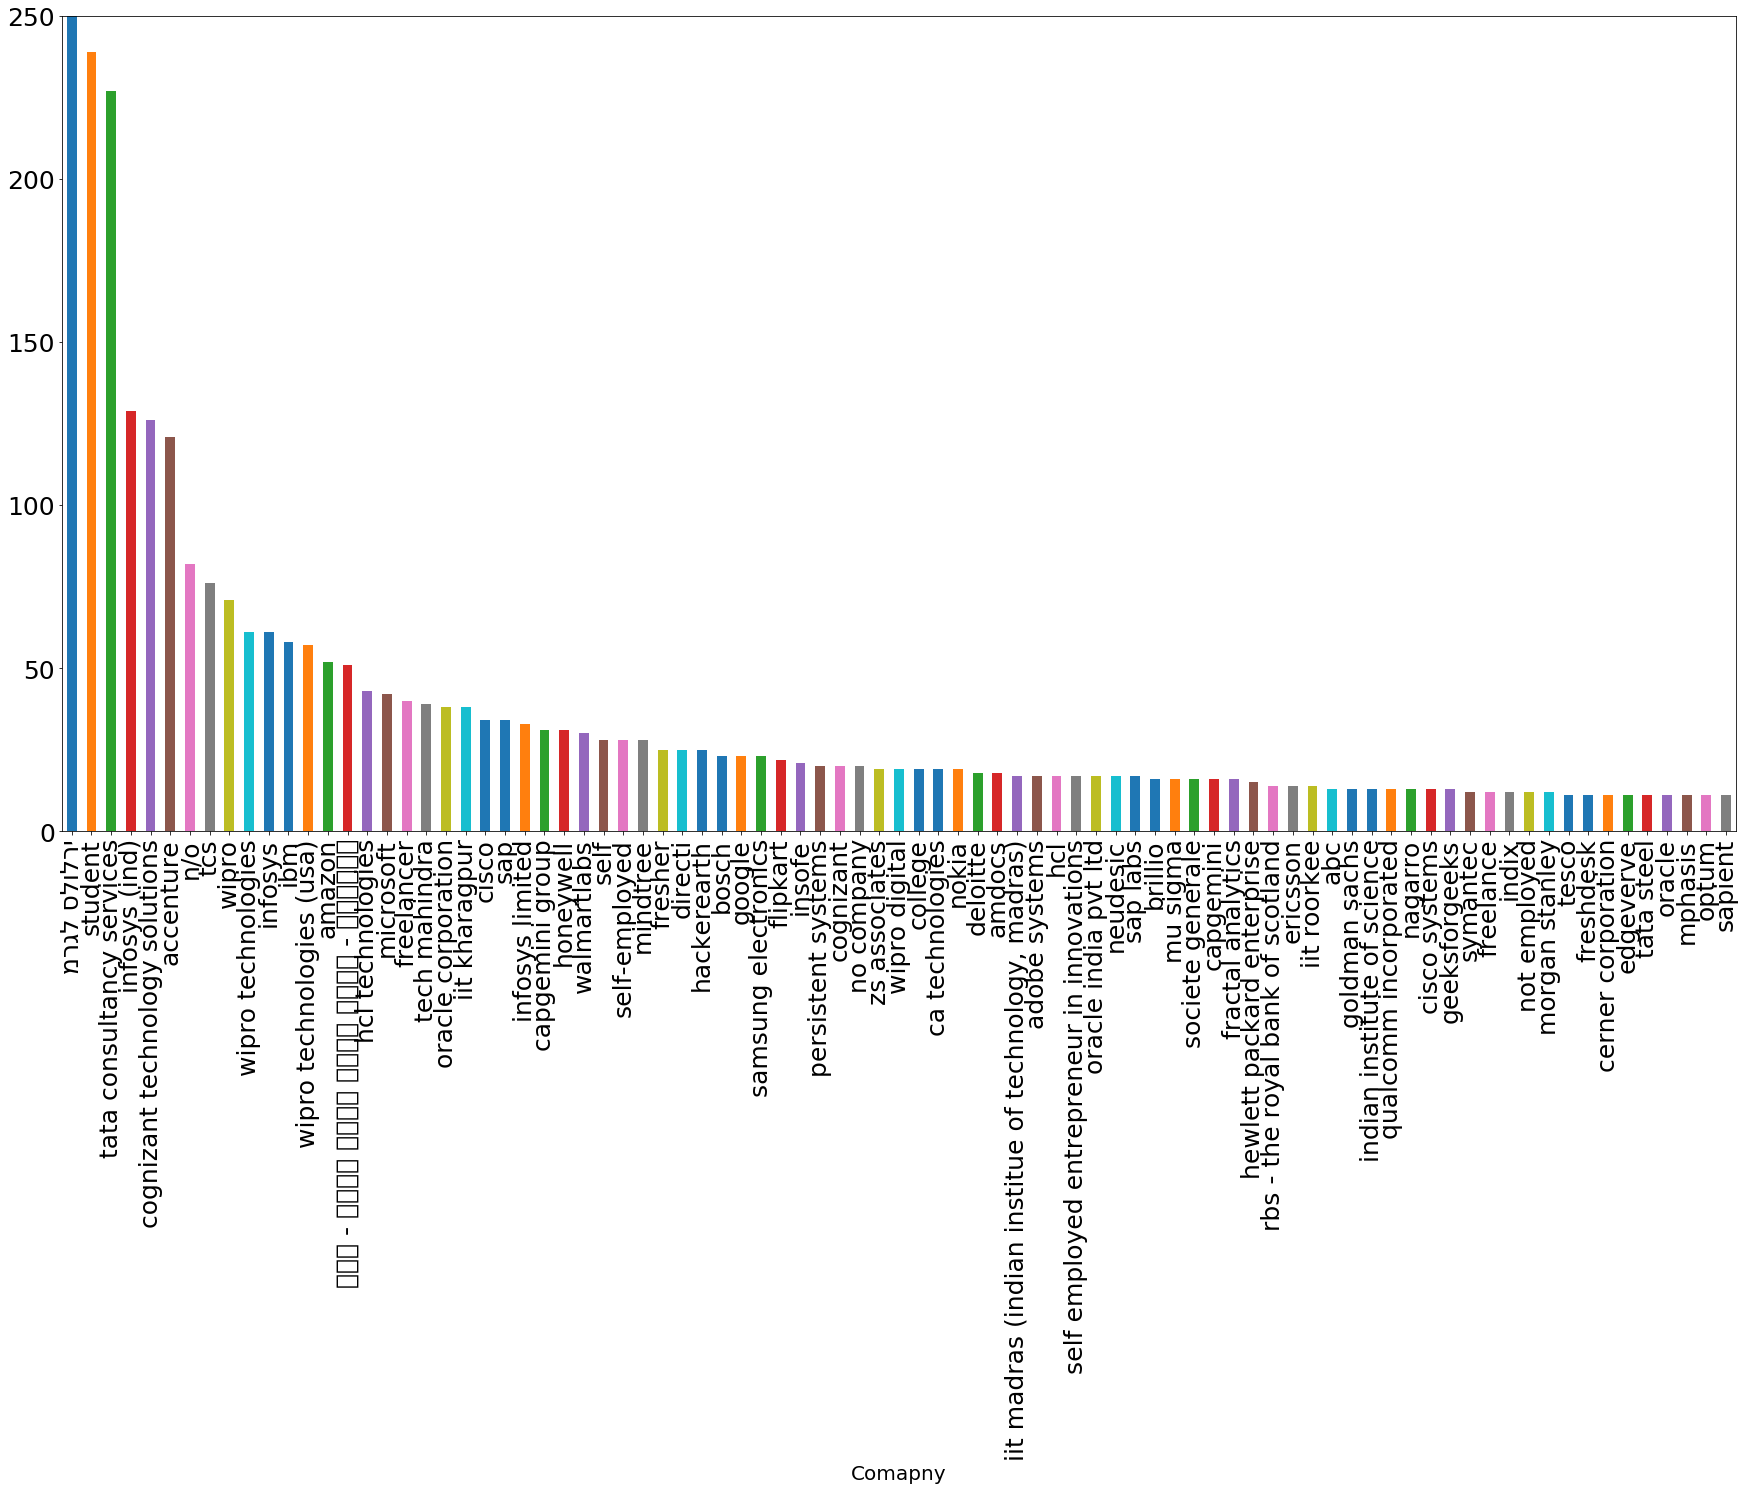

In [36]:
for name in master_names:
    if name not in m1:
        ml1[name] = np.nan
    if name not in m2:
        ml2[name] = np.nan
    if name not in m3:
        ml3[name] = np.nan
    if name not in d:
        dl[name] = np.nan
    if name not in p:
        predict[name] = np.nan
master = pd.concat([ml1,ml2,ml3,dl,predict], ignore_index=True)
company = master['Company'].str.lower()
company = company.groupby(company).filter(lambda x: len(x) > 10)
company.value_counts().plot(kind='bar',figsize=(30,15),ylim=(0,250), fontsize=25)
plt.xlabel('Comapny',fontsize=20)
plt.show()

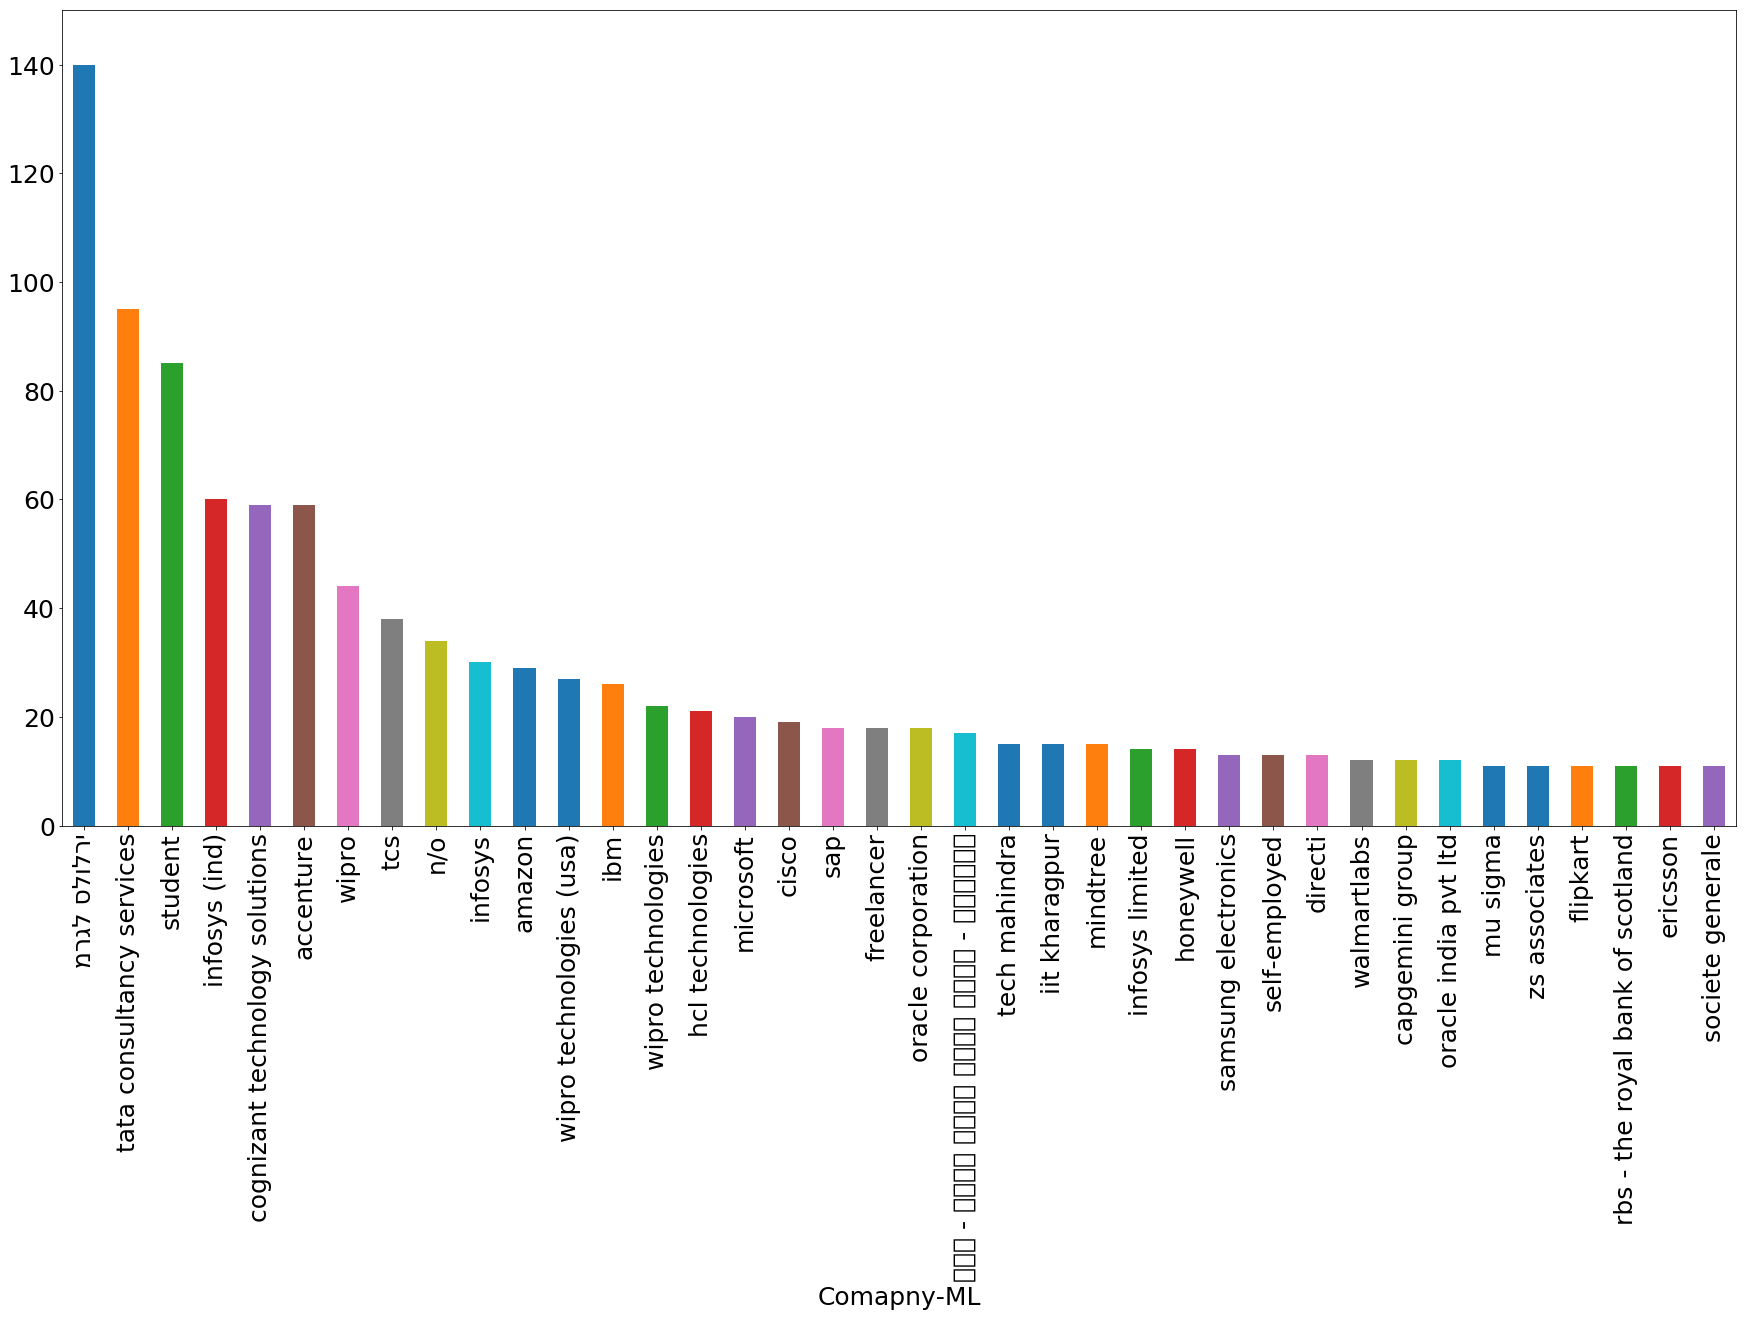

In [42]:
ml_comp=pd.concat([ml1,ml2,ml3], ignore_index=True)
company = ml_comp['Company'].str.lower()
company = company.groupby(company).filter(lambda x: len(x) > 10)
company.value_counts().plot(kind='bar',figsize=(30,15),ylim=(0,150), fontsize=25)
plt.xlabel('Comapny-ML',fontsize=25)
plt.show()

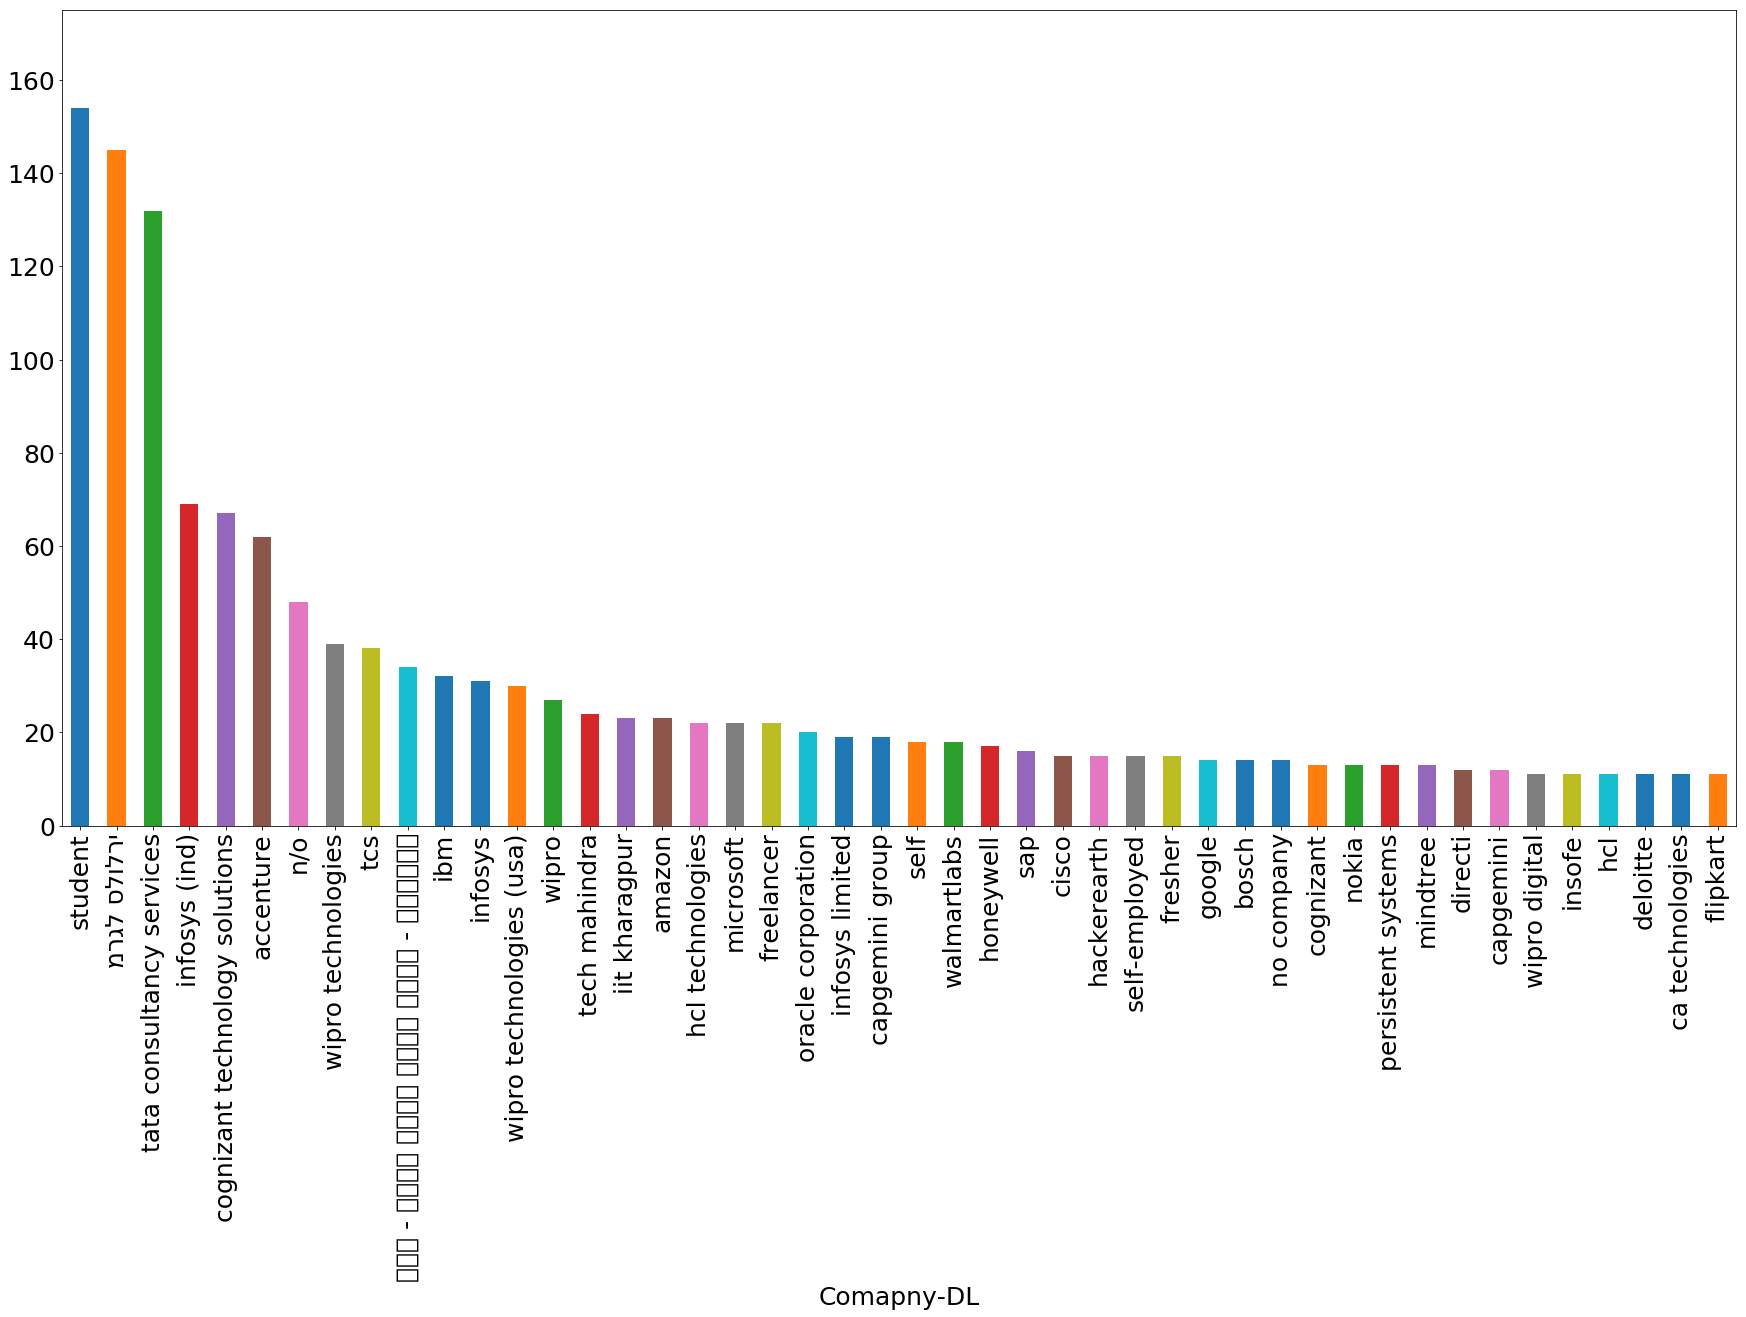

In [43]:
dl_comp=pd.concat([dl,predict], ignore_index=True)
company = dl_comp['Company'].str.lower()
company = company.groupby(company).filter(lambda x: len(x) > 10)
company.value_counts().plot(kind='bar',figsize=(30,15),ylim=(0,175), fontsize=25)
plt.xlabel('Comapny-DL',fontsize=25)
plt.show()

## Job Interest

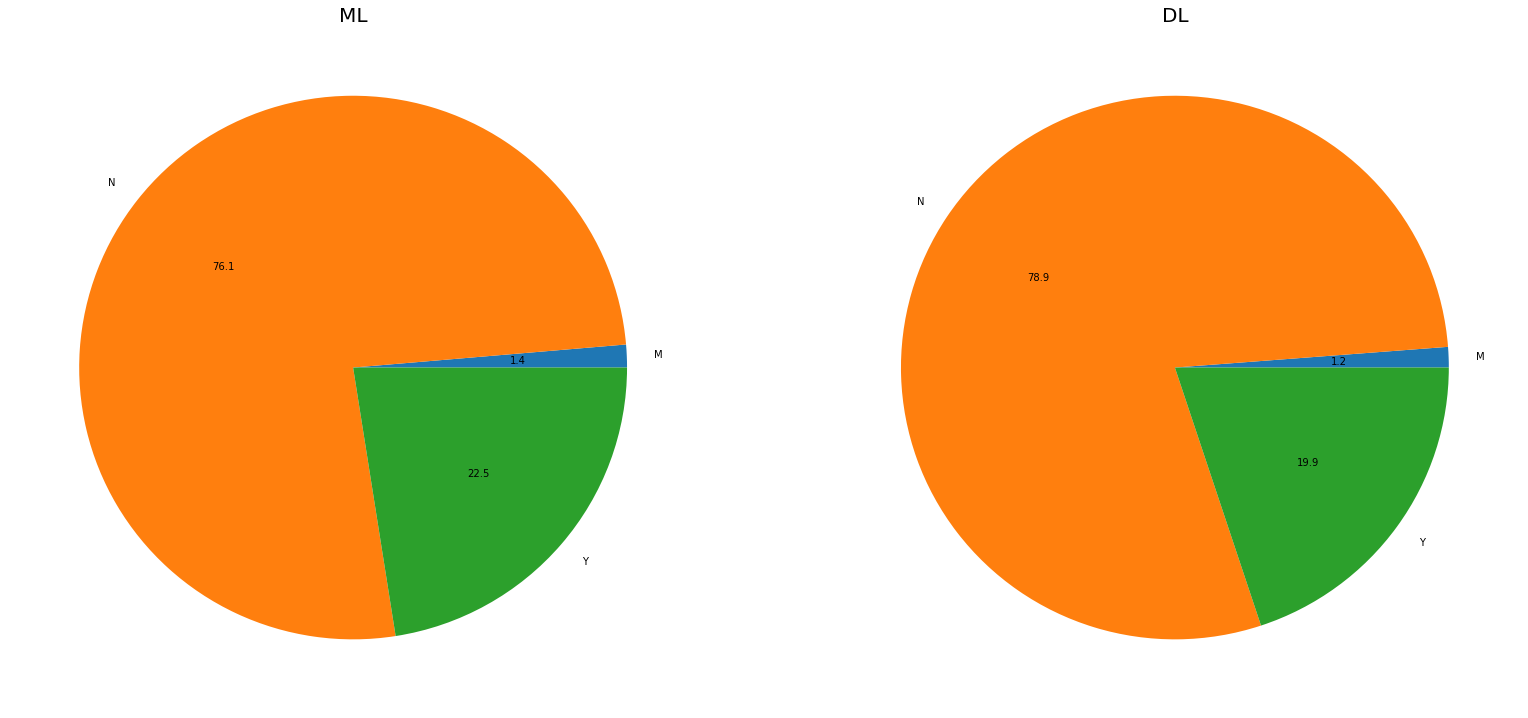

In [48]:
c1 = master[master['Flag'] == 'ML1res']
c2 = master[master['Flag'] == 'ML2res']
c3 = master[master['Flag'] == 'ML3res']
c4 = master[master['Flag'] == 'DL1res']
c5 = master[master['Flag'] == 'Pred-res']
cn = pd.concat([c1,c2,c3], ignore_index=True)
cm = pd.concat([c4,c5], ignore_index=True)
fig = plt.figure(figsize=(27,12.5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ax1.pie(cn.groupby(cn['Job Interest']).size(), autopct = '%.1f', labels=['M','N','Y'])
ax2.pie(cm.groupby(cm['Job Interest']).size(), autopct= '%.1f', labels=['M','N','Y'])
ax1.set_title('ML',fontsize=20)
ax2.set_title('DL',fontsize=20)
plt.show()

In [54]:
money=master[master['Expected CTC'] > master['Current CTC']]

In [57]:
print('{}% of participants feel they are underpaid.'.format(int((len(money)/len(master))*100)))

10% of participants feel they are underpaid.


## Ages of Participants

In [73]:
avg_age=master['Graduation Year'].dropna()
num = pd.to_numeric(avg_age,errors='coerce')
print('The average age of participants for all challenges is {}.'.format(21+(2018-int(num.mean()))))

The average age of participants for all challenges is 23.


In [74]:
avg_ml=cn['Graduation Year'].dropna()
num = pd.to_numeric(avg_ml,errors='coerce')
print('The average age of participants for ML challenges is {}.'.format(21+(2018-int(num.mean()))))

The average age of participants for ML challenges is 24.


In [75]:
avg_dl=cm['Graduation Year'].dropna()
num = pd.to_numeric(avg_dl,errors='coerce')
print('The average age of participants for DL challenges is {}.'.format(21+(2018-int(num.mean()))))

The average age of participants for DL challenges is 23.
